# SmartBeds - Preprocesado de Datos

## Grado en Ingeniería Informática
## Universidad de Burgos
##### José Luis Garrido Labrador

In [1]:
import pandas as pd # se importa pandas como pd
import numpy as np  #numpy como np
import matplotlib.pyplot as plt

In [2]:
import pickle as pk

### Lectura

In [3]:
import loadData as ld

datos = ld.load(r"../data/")
datos = ld.preprocess(datos)
datos.head()

,DateTime,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,target
1,2018-09-14 21:04:18,0.0,2.0,3.0,4.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,False
4,2018-09-14 21:04:21,0.0,2.0,3.0,4.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,False
7,2018-09-14 21:04:24,0.0,2.0,3.0,4.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,False
8,2018-09-14 21:04:25,0.0,2.0,3.0,5.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,False
9,2018-09-14 21:04:26,0.0,2.0,3.0,5.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,False


In [4]:
from sys import getsizeof
print(getsizeof(datos)/(2**30),'GiB')

0.4823642037808895 GiB


### Datos manuales

In [5]:
datos = ld.newSeizure(datos,'2018-11-10 3:30:00',60*20)
#Las siguientes crisis no tienen momeento final, se ha considerado 15

### Preprocesado

In [6]:
# Ordención
datos = datos.sort_values(by='DateTime')

In [7]:
# Eliminación de negativos y filtrado
for d in datos:
    if datos[d].dtype == np.float64:
        datos.loc[datos[d]<5.0,d]=0.0
datos.head()

,DateTime,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,target
1509723,2018-08-28 12:04:57,0.0,14.0,11.0,18.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,False
5729641,2018-08-28 12:06:57,0.0,14.0,11.0,18.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,False
5729667,2018-08-28 12:07:23,0.0,14.0,11.0,19.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,False
5729722,2018-08-28 12:08:19,0.0,14.0,11.0,19.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,False
5729780,2018-08-28 12:09:18,0.0,14.0,11.0,18.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,False


In [8]:
# Normalización
tubesNorm = ld.normalize(datos.iloc[:,1:13])
datos=pd.concat([datos['DateTime'],tubesNorm*100,datos['target']],axis=1)
datos.head()

,DateTime,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,target
1509723,2018-08-28 12:04:57,0.0,11.47541,9.016393,14.754098,0.0,7.377049,0.0,0.0,0.0,0.0,0.0,0.0,False
5729641,2018-08-28 12:06:57,0.0,11.47541,9.016393,14.754098,0.0,7.377049,0.0,0.0,0.0,0.0,0.0,0.0,False
5729667,2018-08-28 12:07:23,0.0,11.47541,9.016393,15.573770,0.0,7.377049,0.0,0.0,0.0,0.0,0.0,0.0,False
5729722,2018-08-28 12:08:19,0.0,11.47541,9.016393,15.573770,0.0,8.196721,0.0,0.0,0.0,0.0,0.0,0.0,False
5729780,2018-08-28 12:09:18,0.0,11.47541,9.016393,14.754098,0.0,7.377049,0.0,0.0,0.0,0.0,0.0,0.0,False


In [9]:
with open('data/datos_raw.pdd','wb') as f:
    pk.dump(datos,f)

In [10]:
# Suavizado
from scipy import signal

dt = datos.iloc[:,1:13]
dtN = dt.copy()
b, a = signal.butter(3, 0.05)
for i in range(len(dt.columns)):
    xn = dt.iloc[:,i]
    y = signal.filtfilt(b, a, xn)
    dtN["P"+str(i+1)]=y
dtN.head()

/usr/local/anaconda3/envs/TFG/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12
1509723,-5.700178e-12,11.475411,9.016399,14.739310,-1.796949e-11,7.365066,2.865581e-322,0.0,-1.136351e-322,-2.865581e-322,-2.223295e-322,-9.387247e-323
5729641,-6.239481e-12,11.475411,9.016399,14.797474,-1.878728e-11,7.379628,2.865581e-322,0.0,-8.893182e-323,-2.865581e-322,-2.075076e-322,-1.185758e-322
5729667,-6.703635e-12,11.475411,9.016400,14.853589,-1.924200e-11,7.394337,2.865581e-322,0.0,-6.422853e-323,-2.865581e-322,-1.926856e-322,-1.383384e-322
5729722,-7.067487e-12,11.475411,9.016401,14.907073,-1.925988e-11,7.408931,2.865581e-322,0.0,-3.952525e-323,-2.865581e-322,-1.778636e-322,-1.581010e-322
5729780,-7.304296e-12,11.475411,9.016401,14.957425,-1.876631e-11,7.423176,2.865581e-322,0.0,-1.482197e-323,-2.865581e-322,-1.630417e-322,-1.729230e-322


In [11]:
## Eliminación de tubos con poca varianza
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=0.5)
presiones_array = sel.fit_transform(dtN)
presiones_array[presiones_array<1e-4]=0

In [12]:
for i in range(1,len(presiones_array[0])+1):
    datos['P'+str(i)]=presiones_array[:,i-1]
listNames = ['DateTime']
for i in range(1,len(presiones_array[0])+1):
    listNames.append("P"+str(i))
listNames.append('target')
datos = datos[listNames]
datos.head()

,DateTime,P1,P2,P3,P4,P5,P6,target
1509723,2018-08-28 12:04:57,0.0,11.475411,9.016399,14.739310,0.0,7.365066,False
5729641,2018-08-28 12:06:57,0.0,11.475411,9.016399,14.797474,0.0,7.379628,False
5729667,2018-08-28 12:07:23,0.0,11.475411,9.016400,14.853589,0.0,7.394337,False
5729722,2018-08-28 12:08:19,0.0,11.475411,9.016401,14.907073,0.0,7.408931,False
5729780,2018-08-28 12:09:18,0.0,11.475411,9.016401,14.957425,0.0,7.423176,False


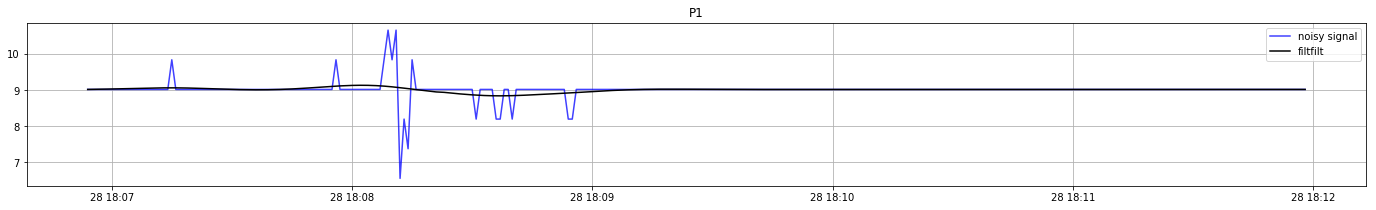

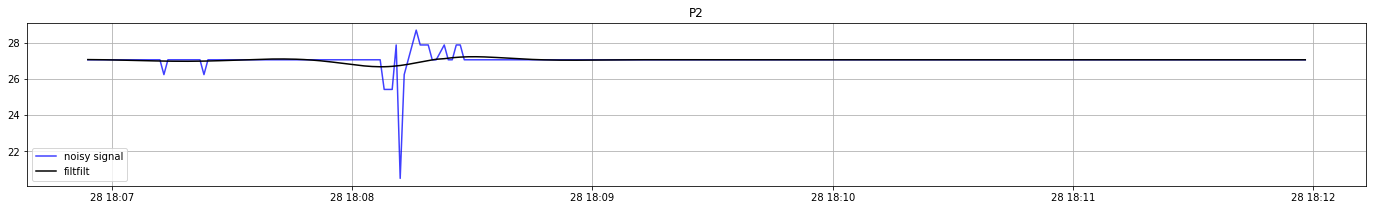

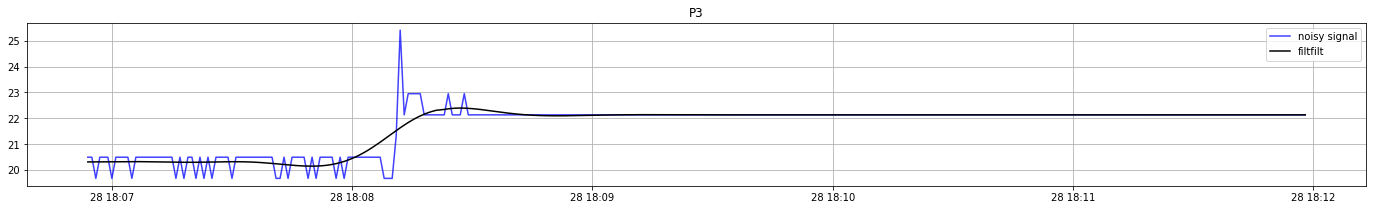

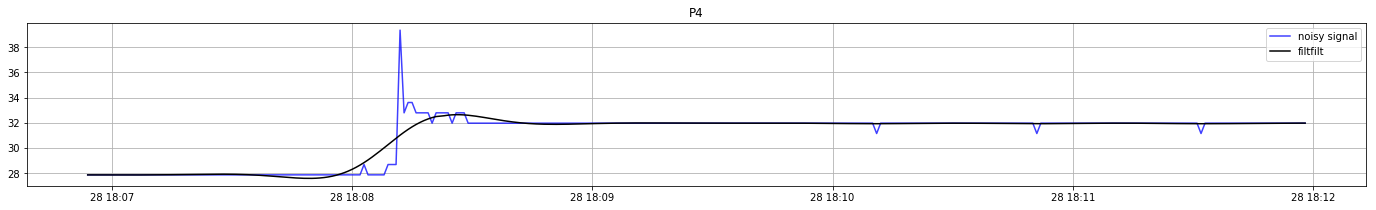

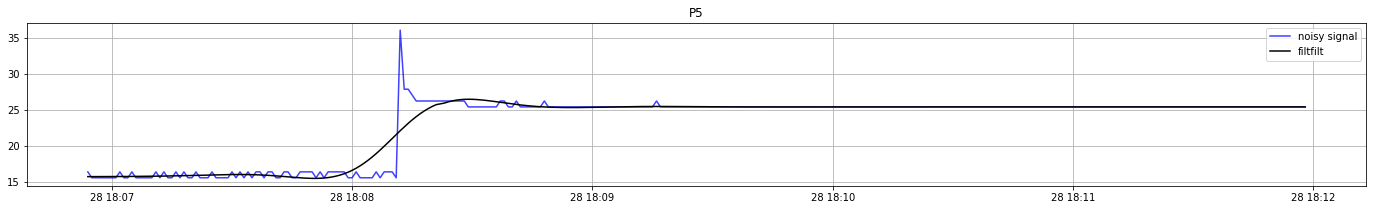

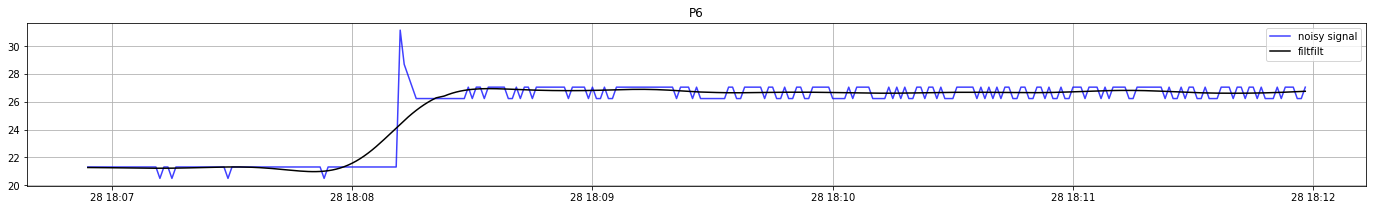

In [13]:
t = datos['DateTime'][11500:11800]
for i in datos.iloc[:,1:len(datos.columns)-1]:
    plt.figure(figsize=(24,3))
    plt.plot(t, dt[i][11500:11800], 'b', alpha=0.75)
    plt.plot(t, dtN[i][11500:11800], 'k')
    plt.legend(('noisy signal','filtfilt'), loc='best')
    plt.title(i)
    plt.grid(True)
    plt.savefig(i+".svg")

### Cálculo de las  estadísticas móviles
#### Widgets

In [14]:
import gc
gc.collect()

14446

In [15]:
import ipywidgets as widgets
from IPython.display import display

slider = widgets.IntSlider(
    value=25,
    min=1,
    max=50,
    description='Ventana:',
    readout=True,
    readout_format='d'
)

button = widgets.Button(
    description='Calcular'
)

progress = widgets.IntProgress(
    value=0,
    min=0,
    max=12,
    step=1,
    description='Procesado:',
    bar_style='', # 'success', 'info', 'warning', 'danger' or ''
    orientation='horizontal'
)

hb = widgets.HBox([slider,button,progress])

In [16]:
display(hb)



def estadisticos(b):
    global slider, dataE, progress
    dataE = datos.copy()
    progress.value = 0
    progress.max = (len(dataE.columns)-2)*3
    
    before = b.description
    b.description='Espera'

    print(" "*100,end='\r')
    
    ventanaMedia = slider.value
    
    for i in range(1,len(datos.columns)-1):
        nombre_col = 'P'+str(i)
        nombre_col_mean = nombre_col+' mean'
        dataE[nombre_col_mean] = dataE[nombre_col].rolling(ventanaMedia).mean()
        progress.value += 1

    ventanaDesviacion = ventanaMedia

    for i in range(1,len(datos.columns)-1):
        nombre_col = 'P'+str(i)
        nombre_col_std = nombre_col+' std'
        dataE[nombre_col_std] = dataE[nombre_col].rolling(ventanaDesviacion).std()
        progress.value += 1
        
    ventanaRango = ventanaMedia

    for i in range(1,len(datos.columns)-1):
        nombre_col = 'P'+str(i)
        nombre_col_std = nombre_col+' range'
        roll = dataE[nombre_col].rolling(ventanaRango)
        dataE[nombre_col_std] = roll.max()-roll.min()
        progress.value += 1
        
    print('Calculos realizados para ventana a',ventanaMedia,end="\r")
    b.description = before
        
    dataE = dataE.dropna()
    
    indices = []

    ataques = dataE.loc[dataE['target'] == True]
    for index, row in ataques.iterrows(): 
        if dataE.loc[index-1,'target'] == False: 
            indices.append(index)

    for i in indices: 
        dataE.loc[i:i+ventanaMedia-1,'target'] = False
    

button.on_click(estadisticos)


#### Normalización de los estadísticos

In [17]:
dataMean = dataE[[x for x in dataE.columns if 'mean' in x]]
dataStd = dataE[[x for x in dataE.columns if 'std' in x]]
dataRank = dataE[[x for x in dataE.columns if 'range' in x]]

In [18]:
dataE.head()

,DateTime,P1,P2,P3,P4,P5,P6,target,P1 mean,P2 mean,...,P3 std,P4 std,P5 std,P6 std,P1 range,P2 range,P3 range,P4 range,P5 range,P6 range
5730230,2018-08-28 12:16:55,0.0,11.475405,9.016358,15.341339,0.0,7.562931,False,0.0,11.475409,...,0.000014,0.181060,0.0,0.061303,0.0,0.000006,0.000044,0.602029,0.0,0.197865
5730231,2018-08-28 12:16:56,0.0,11.475405,9.016354,15.349897,0.0,7.565026,False,0.0,11.475409,...,0.000016,0.163318,0.0,0.056960,0.0,0.000006,0.000048,0.552423,0.0,0.185397
5730232,2018-08-28 12:16:57,0.0,11.475404,9.016350,15.358654,0.0,7.566673,False,0.0,11.475409,...,0.000017,0.146717,0.0,0.052628,0.0,0.000006,0.000052,0.505065,0.0,0.172336
5730233,2018-08-28 12:16:58,0.0,11.475404,9.016347,15.367511,0.0,7.567831,False,0.0,11.475409,...,0.000019,0.131465,0.0,0.048371,0.0,0.000007,0.000055,0.460438,0.0,0.158899
5730234,2018-08-28 12:16:59,0.0,11.475404,9.016344,15.376334,0.0,7.568462,False,0.0,11.475408,...,0.000020,0.117721,0.0,0.044240,0.0,0.000007,0.000057,0.418909,0.0,0.145286


### Exportación

In [18]:
with open('data/datos.pdd','wb') as f:
    pk.dump(datos,f)
    
with open('data/datosE.pdd','wb') as f:
    pk.dump(dataE,f)